In [2]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
task = "pmd_analysis"

# root_model = "tape_rao"
# model_name = "unirep" # unirep, protbert

# root_model = "sequnet_dunham"
# model_name = "sequnet"

root_model = "esm_rives"
model_name = "esm1b_t33_650M_UR50S" # esm1b_t33_650M_UR50S, esm1v_t33_650M_UR90S, esm2_t33_650M_UR50D

# root_model = "bioembeddings_dallago"
# model_name = "prottrans_t5_xl_u50" # plus_rnn, prottrans_bert_bfd, prottrans_albert_bfd, prottrans_xlnet_uniref100, prottrans_t5_bfd, prottrans_t5_uniref50, prottrans_t5_xl_u50

In [11]:
def plot_distribution(result_df, pred_col_name):
    effect = result_df[result_df["functional_effect"]=="Effect"]
    no_effect = result_df[result_df["functional_effect"]=="No effect"]

    bins = 100 # 20, 100, 500
    plt.hist(effect[pred_col_name], bins=bins, density=False, log=False, alpha=.6, label=f"Effect-{model_name}")
    plt.hist(no_effect[pred_col_name], bins=bins, density=False, log=False, alpha=.4, label=f"No effect-{model_name}")
    
    plt.legend()
    plt.show()

### Analysis from merged df

AUC-ROC: 0.736
AUC-PR: 0.700


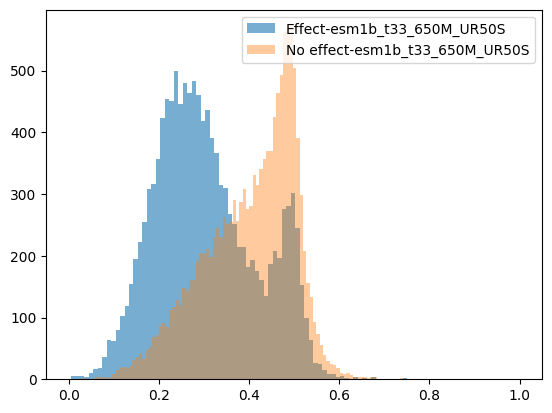

In [12]:
predictions_df = pd.read_csv(home_dir+f"models/aa_common/outputs/{task}_predictions_merged.csv", sep="\t")
pred_col_name = model_name + "_pred"

predictions_df = predictions_df[(predictions_df["functional_effect"]=="Effect") | (predictions_df["functional_effect"]=="No effect")]
predictions_df[pred_col_name]=(predictions_df[pred_col_name]-predictions_df[pred_col_name].min())/(predictions_df[pred_col_name].max()-predictions_df[pred_col_name].min())

predictions_df.loc[predictions_df["functional_effect"]=="Effect", "class_numeric"] = 0
predictions_df.loc[predictions_df["functional_effect"]=="No effect", "class_numeric"] = 1

# AUC-ROC
auc_roc_score = roc_auc_score(predictions_df["class_numeric"], predictions_df[pred_col_name])
if auc_roc_score < 0.5: 
    auc_roc_score = 1 - auc_roc_score
print(f"AUC-ROC: {auc_roc_score:.3f}")

# AUC-PR
precision, recall, _ = precision_recall_curve(predictions_df["class_numeric"], predictions_df[pred_col_name])
auc_pr_score = auc(recall, precision)

if auc_pr_score < 0.5: 
    auc_pr_score = 1 - auc_pr_score
print(f"AUC-PR: {auc_pr_score:.3f}")

plot_distribution(predictions_df, pred_col_name)

### Analysis from individual model's prediction

(51047, 16)
Index(['mut_id', 'pmd_id', 'protein', 'mut_PMD', 'mut_real', 'function',
       'taxid', 'function_e', 'function_e2', 'functional_effect', 'seq',
       'protein_id', 'wt', 'mut', 'prot_pos', 'pred'],
      dtype='object')
AUC-ROC: 0.736
AUC-PR: 0.700


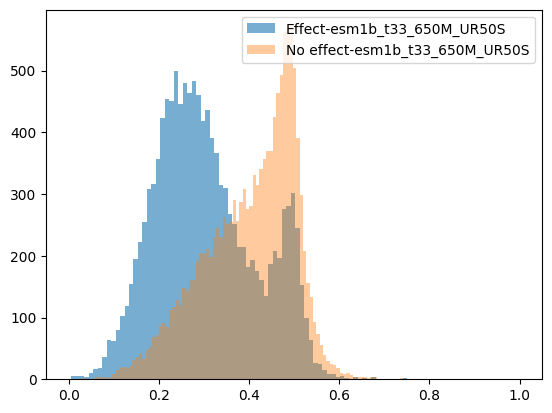

In [13]:
result_df = pd.read_csv(home_dir+f"models/{root_model}/outputs/{model_name}/{task}/preds_{model_name}_(mt-wt).csv", sep=",")
print(result_df.shape)
print(result_df.columns)

result_df = result_df[(result_df["functional_effect"]=="Effect") | (result_df["functional_effect"]=="No effect")]
result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

result_df.loc[result_df["functional_effect"]=="Effect", "class_numeric"] = 0
result_df.loc[result_df["functional_effect"]=="No effect", "class_numeric"] = 1

# AUC-ROC
auc_roc_score = roc_auc_score(result_df["class_numeric"], result_df["pred"])
if auc_roc_score < 0.5: 
    auc_roc_score = 1 - auc_roc_score
print(f"AUC-ROC: {auc_roc_score:.3f}")

# AUC-PR
precision, recall, _ = precision_recall_curve(result_df["class_numeric"], result_df["pred"])
auc_pr_score = auc(recall, precision)

if auc_pr_score < 0.5: 
    auc_pr_score = 1 - auc_pr_score
print(f"AUC-PR: {auc_pr_score:.3f}")

plot_distribution(result_df, "pred")